In [38]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [39]:
# Load dataset
data = pd.read_csv("../data/02_engineered_data.csv")

In [40]:
data.head(10)

,WEIGHT,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,ONLINE_TOTAL,...,YOUTUBE_MOBILE,YOUTUBE_DESKTOP,YOUTUBE_TABLET,YOUTUBE_CTV,PINTEREST,PURCHASE,GENDER_female,GENDER_male,TOTAL_MEDIA_EXPOSURE,AGE_GROUP
0,2581.77,0.0,52.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,1,True,False,3.0,45-54
1,8219.48,1.0,38.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,False,True,5.0,35-44
2,13456.38,0.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,True,False,0.0,18-34
3,6353.90,0.0,91.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,False,True,1.0,75+
4,2966.01,0.0,69.0,2.0,81.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,False,True,82.0,65-74
5,4532.89,0.0,74.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,True,False,11.0,65-74
6,5642.40,0.0,70.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,True,False,0.0,65-74
7,1694.22,0.0,65.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,True,False,3.0,65-74
8,3733.55,0.0,74.0,1.0,19.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,False,True,20.0,65-74
9,5246.94,0.0,57.0,3.0,2.0,3.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0,False,True,9.0,55-64


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15245 entries, 0 to 15244
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   WEIGHT                15245 non-null  float64
 1   NUMBER_OF_CHILDREN    15245 non-null  float64
 2   AGE                   15245 non-null  float64
 3   HOUSEHOLD_SIZE        15245 non-null  float64
 4   TV_TOTAL              15245 non-null  float64
 5   FLYERS                15245 non-null  float64
 6   PRINT_TOTAL           15245 non-null  float64
 7   ONLINE_VIDEO          15245 non-null  float64
 8   ONLINE_DISPLAY        15245 non-null  float64
 9   ONLINE_TOTAL          15245 non-null  float64
 10  TIKTOK                15245 non-null  float64
 11  YOUTUBE_TOTAL         15245 non-null  float64
 12  YOUTUBE_MOBILE        15245 non-null  float64
 13  YOUTUBE_DESKTOP       15245 non-null  float64
 14  YOUTUBE_TABLET        15245 non-null  float64
 15  YOUTUBE_CTV        

In [42]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))

print(f"Number of numerical columns: {len(num_cols)}")
print(num_cols)

Number of numerical columns: 19
['WEIGHT', 'NUMBER_OF_CHILDREN', 'AGE', 'HOUSEHOLD_SIZE', 'TV_TOTAL', 'FLYERS', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'ONLINE_TOTAL', 'TIKTOK', 'YOUTUBE_TOTAL', 'YOUTUBE_MOBILE', 'YOUTUBE_DESKTOP', 'YOUTUBE_TABLET', 'YOUTUBE_CTV', 'PINTEREST', 'PURCHASE', 'TOTAL_MEDIA_EXPOSURE']


In [43]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))

print(f"Number of categorical columns: {len(cat_cols)}")
print(cat_cols)

Number of categorical columns: 3
['AGE_GROUP', 'GENDER_female', 'GENDER_male']


In [44]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

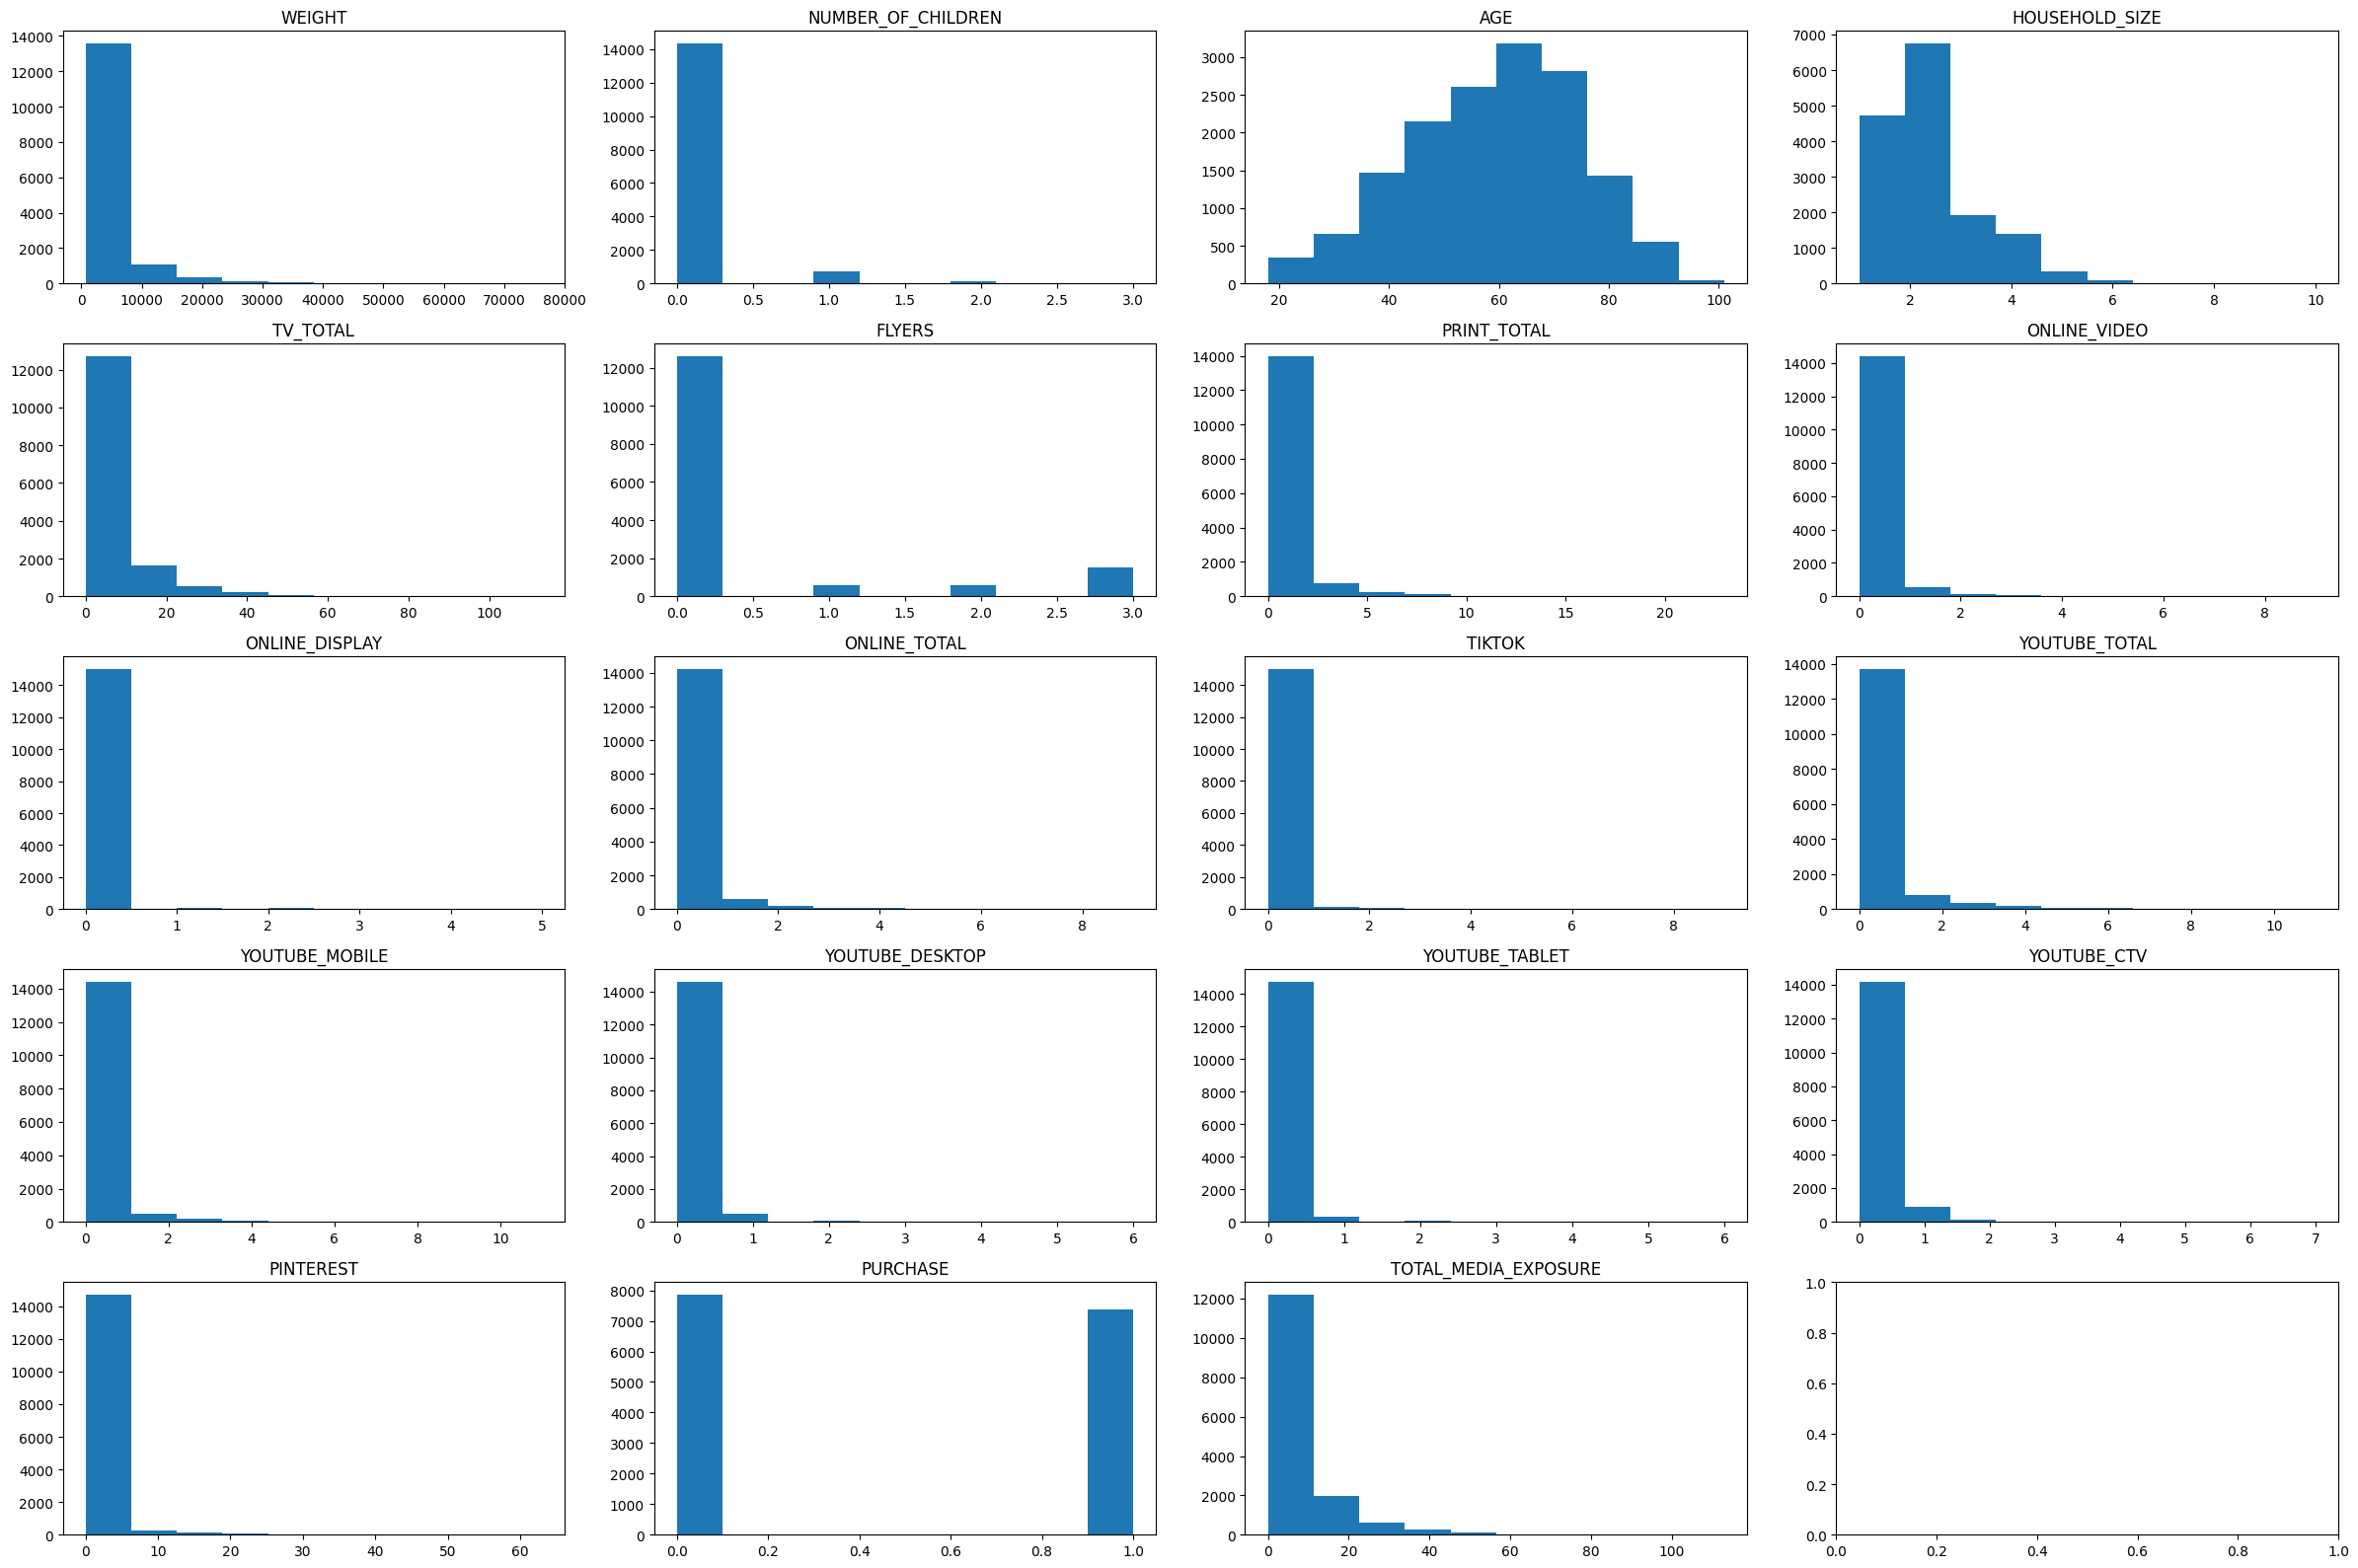

In [45]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

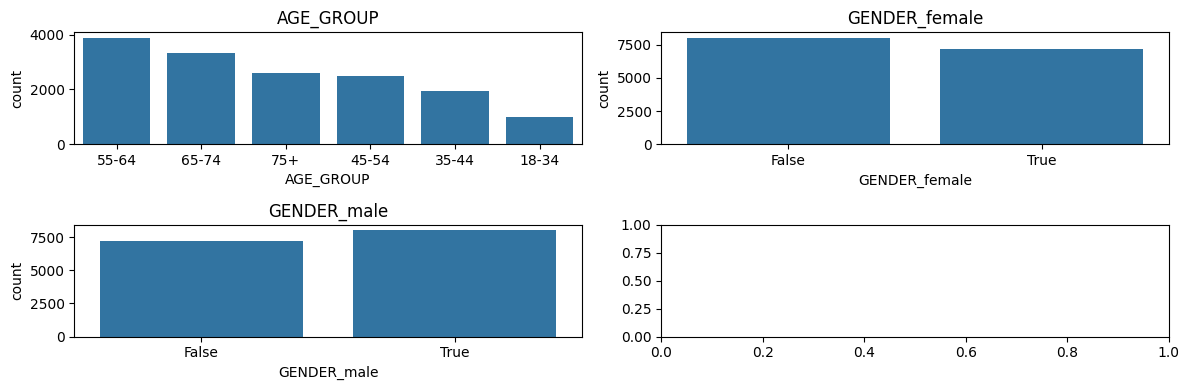

In [46]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Purchase Rate: 48.36%


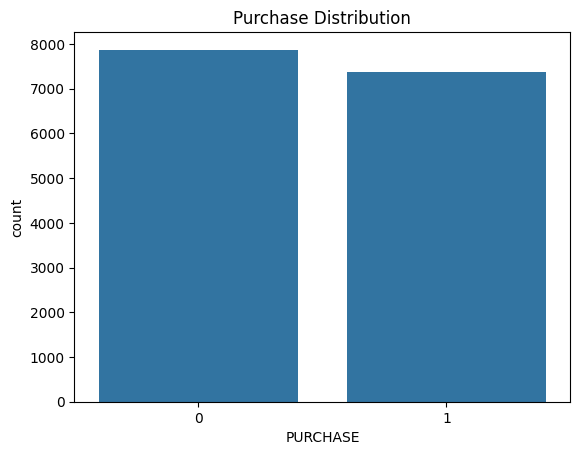

In [47]:
# Check purchase rate
purchase_rate = data['PURCHASE'].mean()
print(f"Purchase Rate: {purchase_rate:.2%}")

# Visualize class balance
sns.countplot(x='PURCHASE', data=data)
plt.title("Purchase Distribution")
plt.show()

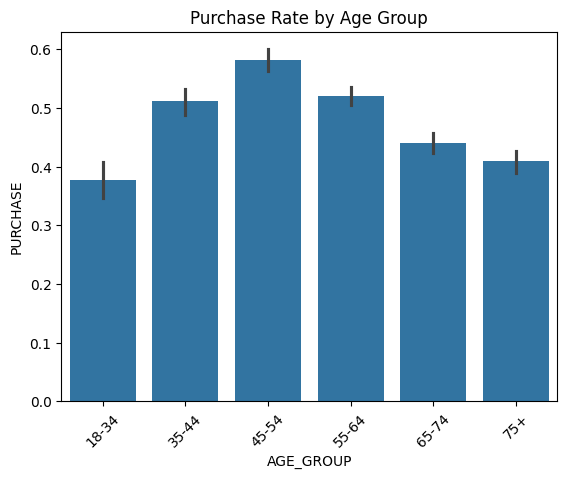

In [48]:
# Plot purchase rate by age group
age_group_order = ['18-34', '35-44', '45-54', '55-64', '65-74', '75+']

sns.barplot(x='AGE_GROUP', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x), order=age_group_order)
plt.title("Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


In [49]:
# # Manually compute weighted purchase rate per age group
# weighted_purchase = (
#     data.groupby("Age_Group").apply(lambda g: np.average(g["Purchase"], weights=g["weight"]))
# ).reset_index(name="Weighted_Purchase_Rate")

# # Now plot using the precomputed values
# sns.barplot(x="Age_Group", y="Weighted_Purchase_Rate", data=weighted_purchase)
# plt.title("Weighted Purchase Rate by Age Group")
# plt.xticks(rotation=45)
# plt.show()

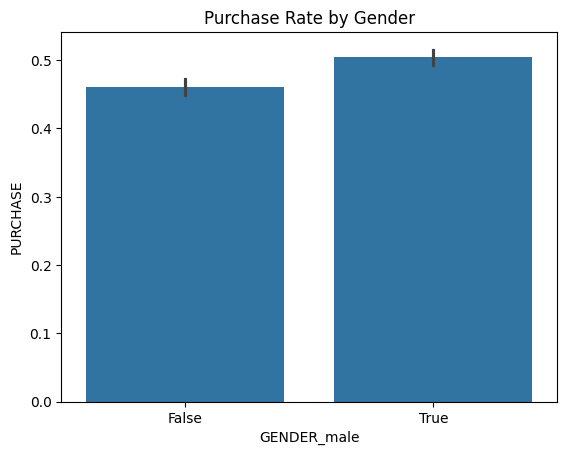

In [50]:
# Filter the data to exclude 'Unknown' gender category as there are only 3 observations
filtered_data = data[data['GENDER_male'] != 'Unknown']

# Plot purchase rate by gender without the 'Unknown' category
sns.barplot(x='GENDER_male', y='PURCHASE', data=filtered_data, estimator=lambda x: sum(x)/len(x))

plt.title("Purchase Rate by Gender")
plt.show()

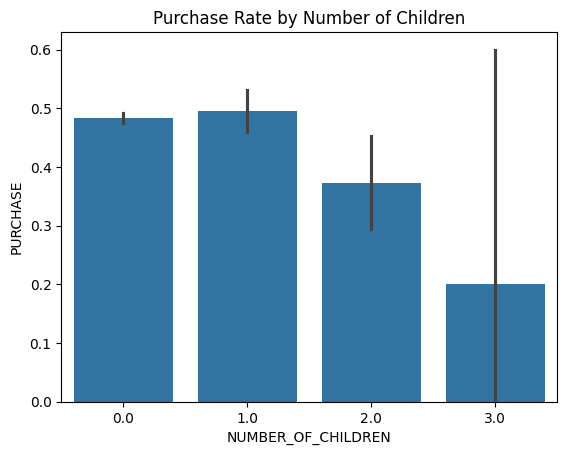

In [51]:
sns.barplot(x='NUMBER_OF_CHILDREN', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Number of Children")
plt.show()


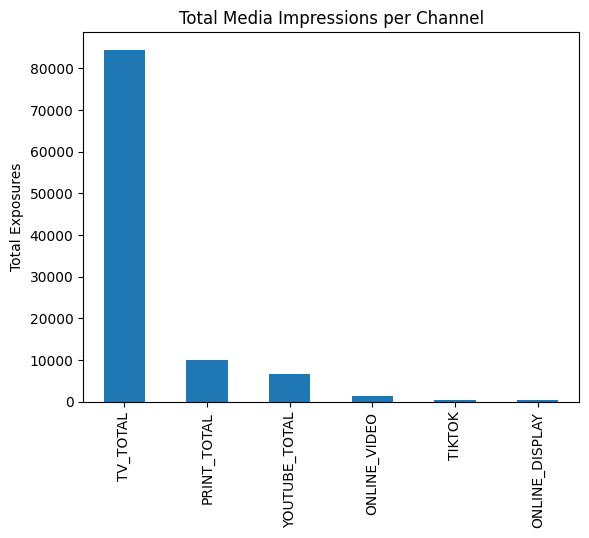

In [52]:
media_channels = ['TV_TOTAL', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'YOUTUBE_TOTAL', 'TIKTOK']

# Sum exposure per channel
media_exposure = data[media_channels].sum().sort_values(ascending=False)

# Plot media exposure
media_exposure.plot(kind='bar')
plt.title("Total Media Impressions per Channel")
plt.ylabel("Total Exposures")
plt.show()


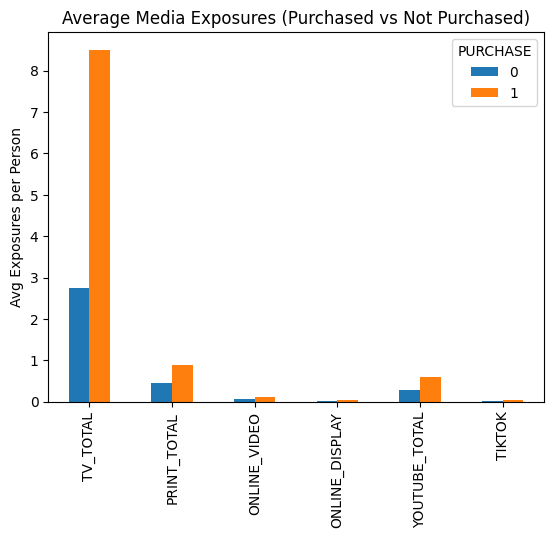

In [53]:
# Calculate average exposure for purchasers vs non-purchasers
purchase_by_channel = data.groupby('PURCHASE')[media_channels].mean().T
purchase_by_channel.plot(kind='bar')
plt.title("Average Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Avg Exposures per Person")
plt.show()


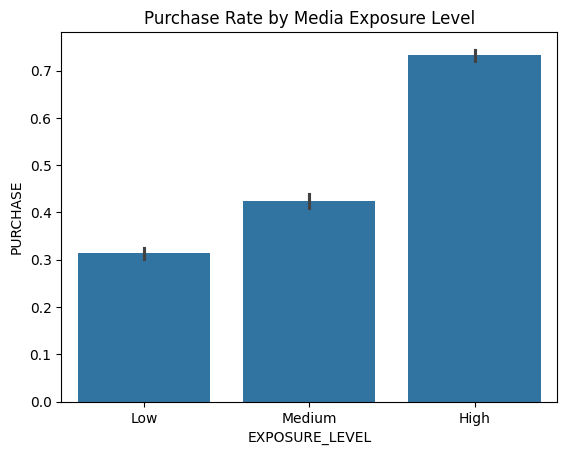

In [54]:
data['TOTAL_MEDIA_EXPOSURE'] = data[media_channels].sum(axis=1)

# Bin people into Low, Medium, and High media exposure
data['EXPOSURE_LEVEL'] = pd.qcut(data['TOTAL_MEDIA_EXPOSURE'], q=3, labels=['Low', 'Medium', 'High'])

sns.barplot(x='EXPOSURE_LEVEL', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Media Exposure Level")
plt.show()

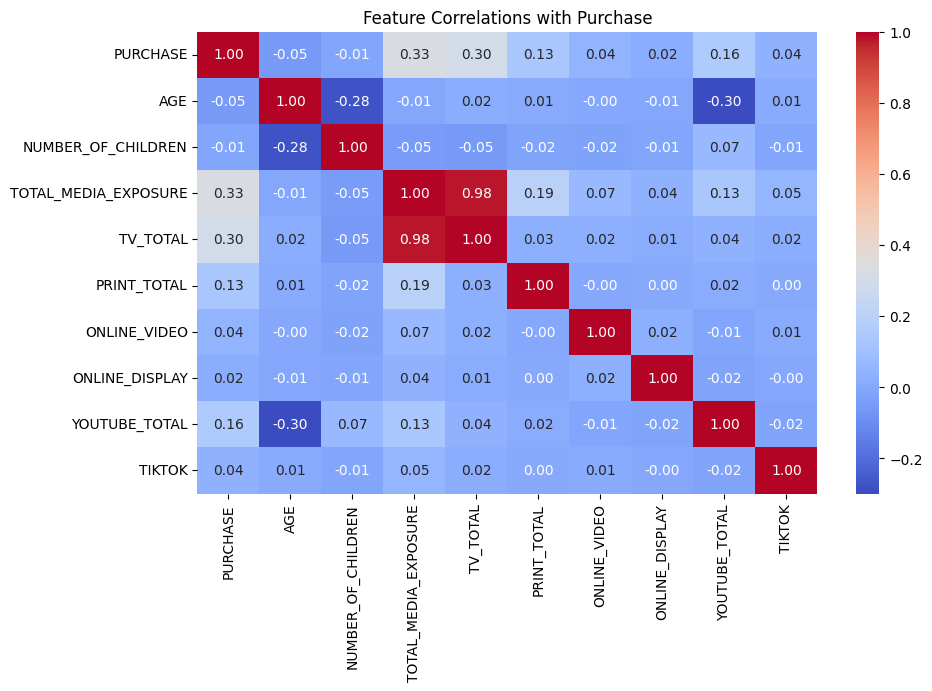

In [55]:
corr = data[['PURCHASE', 'AGE', 'NUMBER_OF_CHILDREN', 'TOTAL_MEDIA_EXPOSURE'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [56]:
purchase_rate_by_age = data.groupby("AGE")["PURCHASE"].mean()
purchase_rate_by_gender = data.groupby("GENDER_male")["PURCHASE"].mean()
purchase_rate_by_household = data.groupby("HOUSEHOLD_SIZE")["PURCHASE"].mean()

In [57]:
purchase_rate_by_age

AGE
18.0     0.130435
19.0     0.071429
20.0     0.341463
21.0     0.288889
22.0     0.229167
           ...   
97.0     0.500000
98.0     0.333333
99.0     0.000000
100.0    0.000000
101.0    0.000000
Name: PURCHASE, Length: 84, dtype: float64

In [58]:
purchase_rate_by_gender

GENDER_male
False    0.461016
True     0.503795
Name: PURCHASE, dtype: float64

In [59]:
purchase_rate_by_household

HOUSEHOLD_SIZE
1.0     0.481208
2.0     0.477155
3.0     0.501308
4.0     0.495677
5.0     0.507163
6.0     0.435897
7.0     0.470588
8.0     0.500000
10.0    0.000000
Name: PURCHASE, dtype: float64